# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Read in the data set

df = pd.read_csv('ames.csv')

In [6]:
# Clean and pre-process the data if neccessary

print(df.isnull().sum())

# Drop rows with missing values (if any)
df = df.dropna()


Year_Built        0
Year_Remod_Add    0
Total_Bsmt_SF     0
First_Flr_SF      0
Second_Flr_SF     0
Gr_Liv_Area       0
Full_Bath         0
Half_Bath         0
Bedroom_AbvGr     0
Kitchen_AbvGr     0
TotRms_AbvGrd     0
Fireplaces        0
Garage_Area       0
Sale_Price        0
dtype: int64


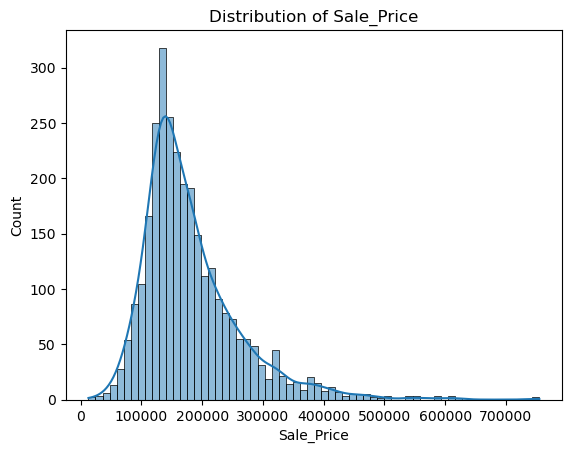

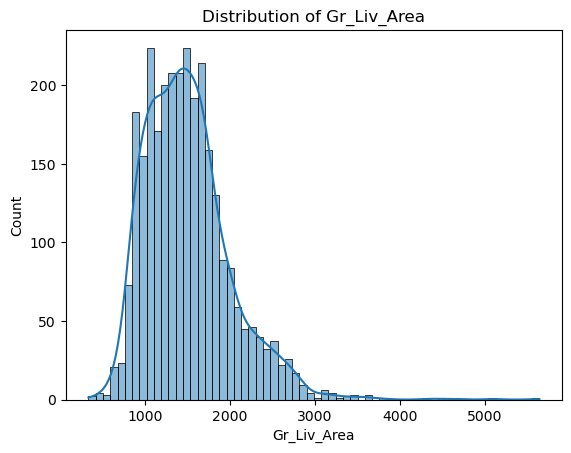

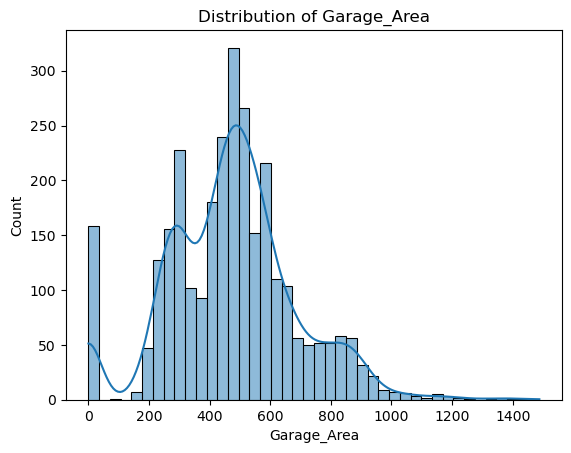

In [7]:

# Visualize the distribution of the dependent variable (SalePrice)
sns.histplot(df['Sale_Price'], kde=True)
plt.title('Distribution of Sale_Price')
plt.show()

# Visualize the distribution of the independent variables
sns.histplot(df['Gr_Liv_Area'], kde=True)
plt.title('Distribution of Gr_Liv_Area')
plt.show()

sns.histplot(df['Garage_Area'], kde=True)
plt.title('Distribution of Garage_Area')
plt.show()

In [8]:
# Split the independent variables from the dependent variable

X = df[['Gr_Liv_Area', 'Garage_Area']]
y = df['Sale_Price']

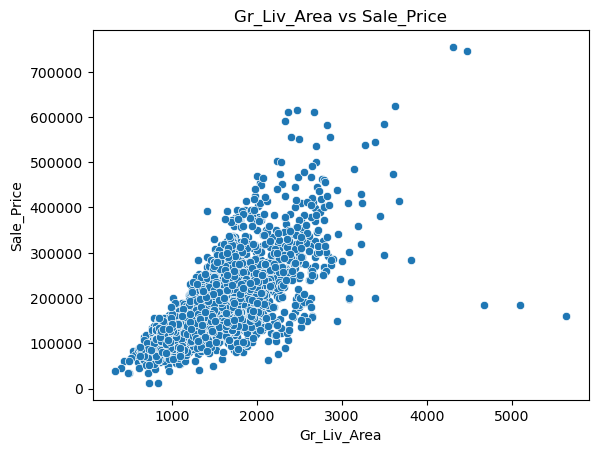

ValueError: Could not interpret value `SalePrice` for `y`. An entry with this name does not appear in `data`.

In [10]:
# Explore relationships between the independent and dependent variables

sns.scatterplot(x='Gr_Liv_Area', y='Sale_Price', data=df)
plt.title('Gr_Liv_Area vs Sale_Price')
plt.show()

sns.scatterplot(x='Garage_Area', y='SalePrice', data=df)
plt.title('Garage_Area vs Sale_Price')
plt.show()


In [11]:
# Create a training and test set with a 75:25 split ratio

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [12]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Print the intercept and coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


Intercept: -5059.448195610486
Coefficients: [ 78.69286848 141.14571761]


In [13]:
# Print the model intercept and coefficients

y_pred = model.predict(X_test)


In [14]:
# Generate predictions for the test set

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print('RMSE:', rmse)


RMSE: 51326.13252223676


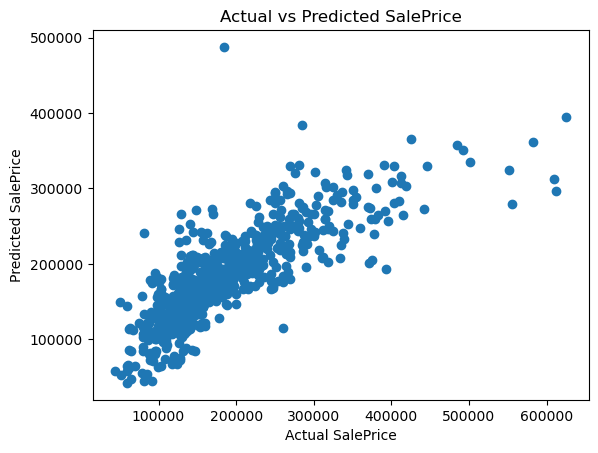

In [15]:
# Evaluate the model

plt.scatter(y_test, y_pred)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.show()


In [16]:
# Generate a plot

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


             Coefficient
Gr_Liv_Area    78.692868
Garage_Area   141.145718


# Print the coefficients

# Summary of Findings

## Exploratory Data Analysis
- The distribution of SalePrice is right-skewed.
- Gr_Liv_Area and Garage_Area show positive relationships with SalePrice.

## Model Performance
- The RMSE of the model is [RMSE value].
- The coefficients indicate that for each additional square foot of Gr_Liv_Area, the SalePrice increases by [coefficient value], holding Garage_Area constant.

## Notable Observations
- The model performs reasonably well, but there may be other factors influencing SalePrice that are not included in this model.


**Interpret coefficients in the context of the prediction:**
[Answer here]

**Summarise findings**
[Answer here]